In [ ]:
#import relevant libraries
#Load modules
import os

if os.path.exists('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\MBON_Chrimson_Farhan\\')==True:
    os.chdir('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\MBON_Chrimson_Farhan\\') #Put the location you want this file to be in

import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
import dabest
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from tqdm import tqdm
from time import sleep
import plotly.graph_objects as go
from scipy.signal import find_peaks
from numpy import genfromtxt
from scipy import fftpack
import scipy.stats as stats
import scipy 
from struct import *
import math
import osar
import sys
import glob
import scipy as sp
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import re
import warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="default", category=RuntimeWarning)

In [ ]:
#nicole's data
root = "D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\ACR\\"
#root = "D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Chrimson2\\"
#root = "C:\\Users\\lnico\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\ACR\\"
startdir = os.listdir(root)
baseDirectory=[]
basegenotype=[]
for n,sd in enumerate(startdir):
    dir1 = os.path.join(root, os.listdir(root)[n])
    baseDirectory.append(dir1)
    basegenotype.append(re.search(r'^.*?(?= x )', (os.path.split(dir1)[1])).group(0))
    #basegenotype.append(re.search(r'^.*?(?=-Gal4)', (os.path.split(dir1)[1])).group(0))
        
        
dfs=[]
for loc,name in zip(baseDirectory,basegenotype):
    dfs.append(osar.osar(loc,driver = name).results)

Creating borders for each fly...
Done.

Processing CSV 71 of 71
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 56 of 56
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 57 of 57
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 52 of 52
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 65 of 65
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 84 of 84
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 68 of 68
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 79 of 79
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 55 of 55
Summarising results for all flies...
All done.
C

In [ ]:
df=pd.concat(dfs)
df.to_csv('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\ACRcompilation_full.csv')


In [ ]:
df2= pd.read_csv('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\ACRcompilation_full.csv')
#df2 = pd.read_csv("C:\\Users\\lnico\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Chrimson2compilation.csv")
#df2 = pd.read_csv("D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Chrimson2compilation_full.csv")


basegenotype = df2['driver'].unique()

In [ ]:
import scikits.bootstrap as skb
from osar.plot_helpers.plot_helpers import r2_and_slope

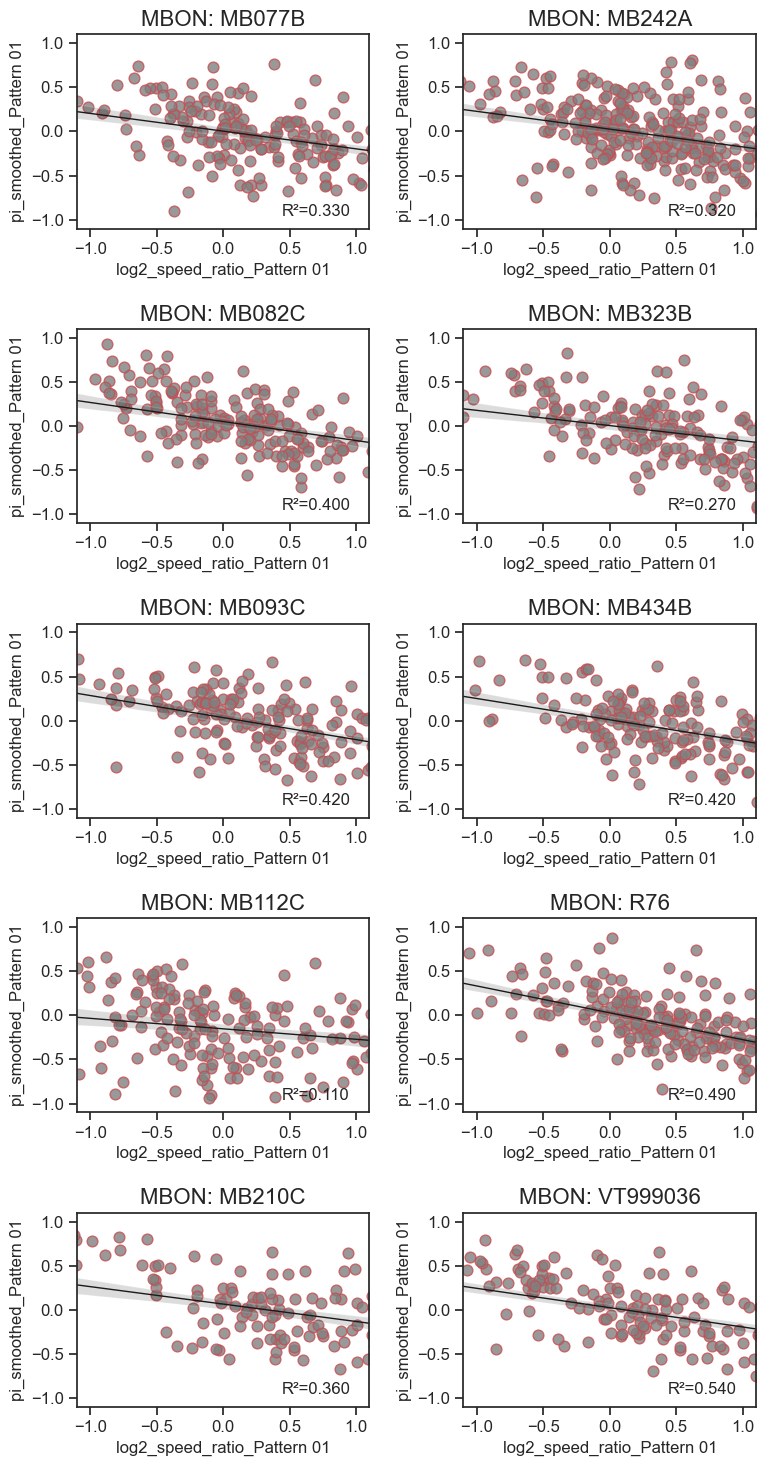

In [ ]:
import plotly.express as px
import seaborn as sns
df= df2
dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full') & (df2['status'] == 'Offspring')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)

osar_data = dfi
dfrrr = pd.DataFrame()
sns.set(style='ticks', font_scale=1.5)
decimal_places = 2

#f, ax = plt.subplots(nrows=4, ncols=3,figsize=(20,20))
#f, ax = plt.subplots(nrows=3, ncols=2,figsize=(10,10))  #Chrimson2
f, ax = plt.subplots(nrows=5, ncols=2,figsize=(8,15))  #ACR

#for name,row,col in zip(basegenotype,3*[0,1,2],3*[0]+3*[1]+3*[2]): #Chrimson2
for name,row,col in zip(basegenotype,5*[0,1,2,3,4],5*[0]+5*[1]+5*[2]+5*[3]+5*[4]): #ACR
#for name,row,col in zip(basegenotype,4*[0,1,2,3],4*[0]+4*[1]+4*[2]+4*[3]):
    ax[row][col].set_ylim(-1.1,1.1)  
    ax[row][col].set_xlim(-1.1,1.1) 
    ax[row][col].tick_params(axis='x', labelsize= 12)
    ax[row][col].tick_params(axis='y', labelsize= 12)
    ax[row][col].set_ylabel('PI', fontsize=12)
    ax[row][col].set_xlabel('log2_speed_ratio', fontsize=12)
    ax[row][col].set_title("MBON: "+ name, fontsize = 16)
    
    df=osar_data[osar_data['MBON']==name]
    ax[row][col].scatter(df['log2_speed_ratio_Pattern 01'], 
                df['pi_smoothed_Pattern 01'],
                color='grey',
                edgecolors="r",
                alpha=0.8,
                s=60)
    
    sns.regplot(df['log2_speed_ratio_Pattern 01'],
                df['pi_smoothed_Pattern 01'],
                scatter=False,
                line_kws={'lw':1}, 
                color="k",
                ax=ax[row][col],
                truncate=False)
    
    
    
    x = df['log2_speed_ratio_Pattern 01'].to_numpy()
    y = df['pi_smoothed_Pattern 01'].to_numpy()

    finiteMask = np.isfinite([x, y]).all(axis=0)
    
    corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
    lowers, uppers = skb.ci((x[finiteMask], y[finiteMask]), 
                            statfunction=r2_and_slope, 
                            n_samples=3000)
    
    r2 = np.round(corr.rvalue**2, decimal_places)
    r2_lower = np.round(lowers[0], decimal_places)
    r2_upper = np.round(uppers[0], decimal_places)

    ax[row][col].annotate('R\u00b2='+str("{:.3f}".format(r2)), 
                     xy=(0.70, 0.05),  # xy coords
                     xycoords='axes fraction',
                     ha='left', va='bottom',
                     fontsize=12)
    
plt.tight_layout()

#plt.savefig("D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\Images\\Nicole's figures\\ACR\\regressionhalffull20221003.svg")


C:\Users\lnico\AppData\Local\Temp\ipykernel_10528\3204605160.py:60: InstabilityWarning:

Some values used top 10 low/high samples; results may be unstable.

C:\Users\lnico\AppData\Local\Temp\ipykernel_10528\3204605160.py:60: InstabilityWarning:

Some values used extremal samples; results are probably unstable.

C:\Users\lnico\AppData\Local\Temp\ipykernel_10528\3204605160.py:60: InstabilityWarning:

Some values used top 10 low/high samples; results may be unstable.

C:\Users\lnico\AppData\Local\Temp\ipykernel_10528\3204605160.py:60: InstabilityWarning:

Some values used extremal samples; results are probably unstable.

C:\Users\lnico\AppData\Local\Temp\ipykernel_10528\3204605160.py:60: InstabilityWarning:

Some values used top 10 low/high samples; results may be unstable.

C:\Users\lnico\AppData\Local\Temp\ipykernel_10528\3204605160.py:60: InstabilityWarning:

Some values used extremal samples; results are probably unstable.

C:\Users\lnico\AppData\Local\Temp\ipykernel_10528\3204605160.

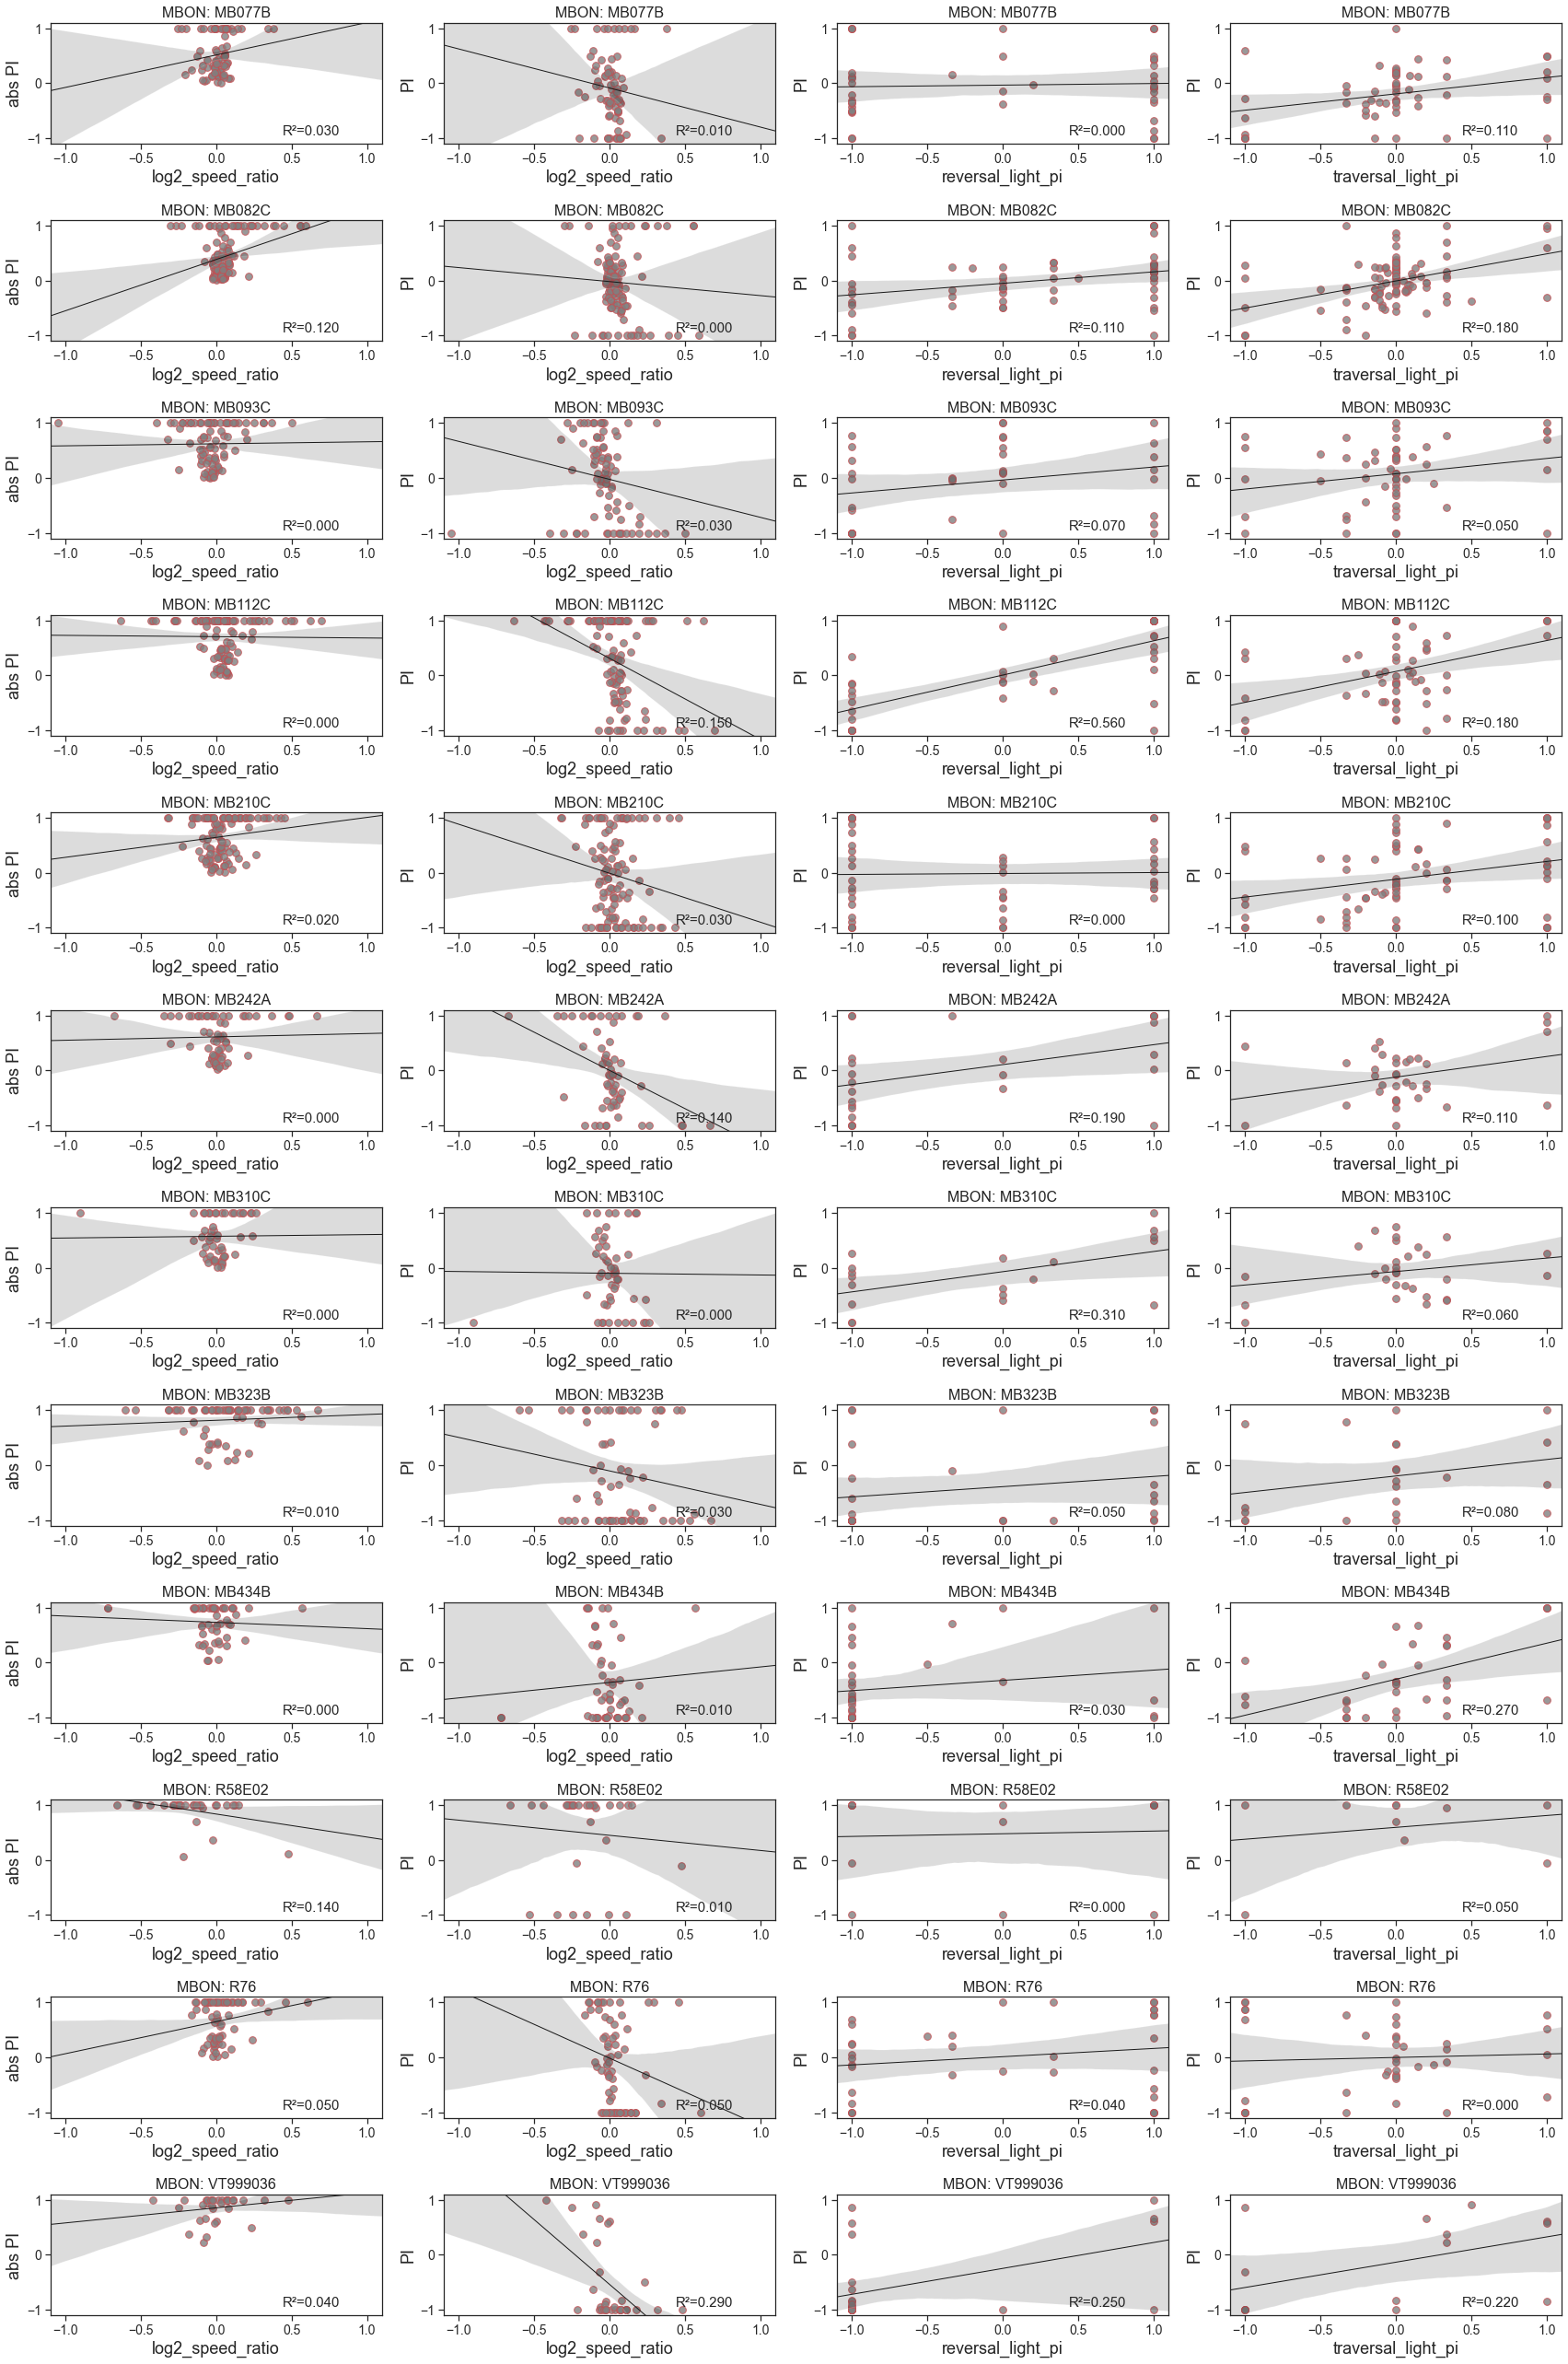

In [ ]:
#massplots
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score
import plotly.express as px
import scikits.bootstrap as skb
from osar.plot_helpers.plot_helpers import r2_and_slope

df= pd.read_csv('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Chrimson2compilation.csv')
dfi=df[(df['light_intensity']=='Full') & (df['status'] == 'Offspring')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)
dfi["abs_pi_smoothed_bs"] = abs(dfi["pi_smoothed_baseline_corrected"])
dfi["abs_pi_smoothed_nbs"] = abs(dfi["pi_smoothed_not_baseline_corrected"])
dfi["abs PI"] = abs(dfi["pi_smoothed_Pattern 01"])
dfi["PI"]= dfi["pi_smoothed_Pattern 01"]

osar_data = dfi

sns.set(style='ticks', font_scale=1.5)
decimal_places = 2

f, ax = plt.subplots(nrows=len(basegenotype), ncols=4,figsize=(24,36))

for name,row in zip(basegenotype,np.arange(0,len(basegenotype),1)):
    df=osar_data[osar_data['MBON']==name]
    
                    
    for col,xval,yval in zip([0,1,2,3],['log2_speed_ratio','log2_speed_ratio','reversal_light_pi', 'traversal_light_pi'],["abs PI",'PI','PI','PI']):
        ax[row][col].set_ylim(-1.1,1.1)  
        ax[row][col].set_xlim(-1.1,1.1) 
        ax[row][col].tick_params(axis='x', labelsize= 14)
        ax[row][col].tick_params(axis='y', labelsize= 14)
        ax[row][col].set_title("MBON: "+ name, fontsize = 16)
        
        ax[row][col].scatter(df[xval], 
                df[yval],
                color='grey',
                edgecolors="r",
                alpha=0.8,
                s=60)
    
        sns.regplot(df[xval],
                df[yval],
                scatter=False,
                line_kws={'lw':1}, 
                color="k",
                ax=ax[row][col],
                truncate=False)

        x = df[xval].to_numpy()
        y = df[yval].to_numpy()

        finiteMask = np.isfinite([x, y]).all(axis=0)

        corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
        lowers, uppers = skb.ci((x[finiteMask], y[finiteMask]), 
                                statfunction=r2_and_slope, 
                                n_samples=3000)

        r2 = np.round(corr.rvalue**2, decimal_places)
        r2_lower = np.round(lowers[0], decimal_places)
        r2_upper = np.round(uppers[0], decimal_places)

       # annot_text = r'$R^{2}=$' + \
            #'{} [95CI {}, {}]\n'.format(r2)

        ax[row][col].annotate('R\u00b2='+str("{:.3f}".format(r2)), 
                         xy=(0.70, 0.05),  # xy coords
                         xycoords='axes fraction',
                         ha='left', va='bottom',
                         fontsize=15)

plt.tight_layout()
plt.savefig("D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\Images\\Nicole's figures\\Chrimson\\NEW_regressionplotsMBONs_ALLPIvalues.svg")

In [ ]:
dfi

flyid    exptDate      MBON  \
678   MB077B_Chrimson_MB077B x Chrimson2_Full_Offspr...  2022-04-22    MB077B   
679   MB077B_Chrimson_MB077B x Chrimson2_Full_Offspr...  2022-04-22    MB077B   
680   MB077B_Chrimson_MB077B x Chrimson2_Full_Offspr...  2022-04-22    MB077B   
681   MB077B_Chrimson_MB077B x Chrimson2_Full_Offspr...  2022-04-22    MB077B   
682   MB077B_Chrimson_MB077B x Chrimson2_Full_Offspr...  2022-04-22    MB077B   
...                                                 ...         ...       ...   
8470  VT999036_Chrimson_VT999036 x Chrimson2_Full_Of...  2021-09-17  VT999036   
8471  VT999036_Chrimson_VT999036 x Chrimson2_Full_Of...  2021-09-17  VT999036   
8472  VT999036_Chrimson_VT999036 x Chrimson2_Full_Of...  2021-09-17  VT999036   
8473  VT999036_Chrimson_VT999036 x Chrimson2_Full_Of...  2021-09-17  VT999036   
8474  VT999036_Chrimson_VT999036 x Chrimson2_Full_Of...  2021-09-17  VT999036   

     expt_time_start              genotype     opsin light_intensity  \
678         14-56-26    MB077B x Chrimson2  Chrimson            Full   
679         14-56-26    MB077B x Chrimson2  Chrimson            Full   
680         14-56-26    MB077B x Chrimson2  Chrimson            Full   
681         14-56-26    MB077B x Chrimson2  Chrimson            Full   
682         14-56-26    MB077B x Chrimson2  Chrimson            Full   
...              ...                   ...       ...             ...   
8470        13-06-25  VT999036 x Chrimson2  Chrimson            Full   
8471        13-06-25  VT999036 x Chrimson2  Chrimson            Full   
8472        13-06-25  VT999036 x Chrimson2  Chrimson            Full   
8473        13-06-25  VT999036 x Chrimson2  Chrimson            Full   
8474        13-06-25  VT999036 x Chrimson2  Chrimson            Full   

     light_color     status  reversals_to_light_BASELINE  ...  \
678          Red  Offspring                          0.0  ...   
679          Red  Offspring                          1.0  ...   
680          Red  Offspring                          0.0  ...   
681          Red  Offspring                          0.0  ...   
682          Red  Offspring                          0.0  ...   
...          ...        ...                          ...  ...   
8470         Red  Offspring                          0.0  ...   
8471         Red  Offspring                          0.0  ...   
8472         Red  Offspring                          1.0  ...   
8473         Red  Offspring                          0.0  ...   
8474         Red  Offspring                          1.0  ...   

      pi_smoothed_not_baseline_corrected  reversals_to_light  \
678                            -0.211829                 1.0   
679                            -0.134259                 1.0   
680                             0.376648                 0.0   
681                            -0.495703                 0.0   
682                            -0.157063                 0.0   
...                                  ...                 ...   
8470                           -1.000000                 0.0   
8471                           -0.971390                 0.0   
8472                           -0.945578                 0.0   
8473                            0.000000                 1.0   
8474                           -0.467302                 0.0   

      traversals_to_light  reversals_to_dark  traversals_to_dark  \
678                   4.0                1.0                 6.0   
679                   1.0                2.0                 1.0   
680                   1.0                0.0                 0.0   
681                   5.0                1.0                 5.0   
682                  13.0                0.0                11.0   
...                   ...                ...                 ...   
8470                  0.0                0.0                 0.0   
8471                  0.0                6.0                 0.0   
8472                  0.0                1.0      

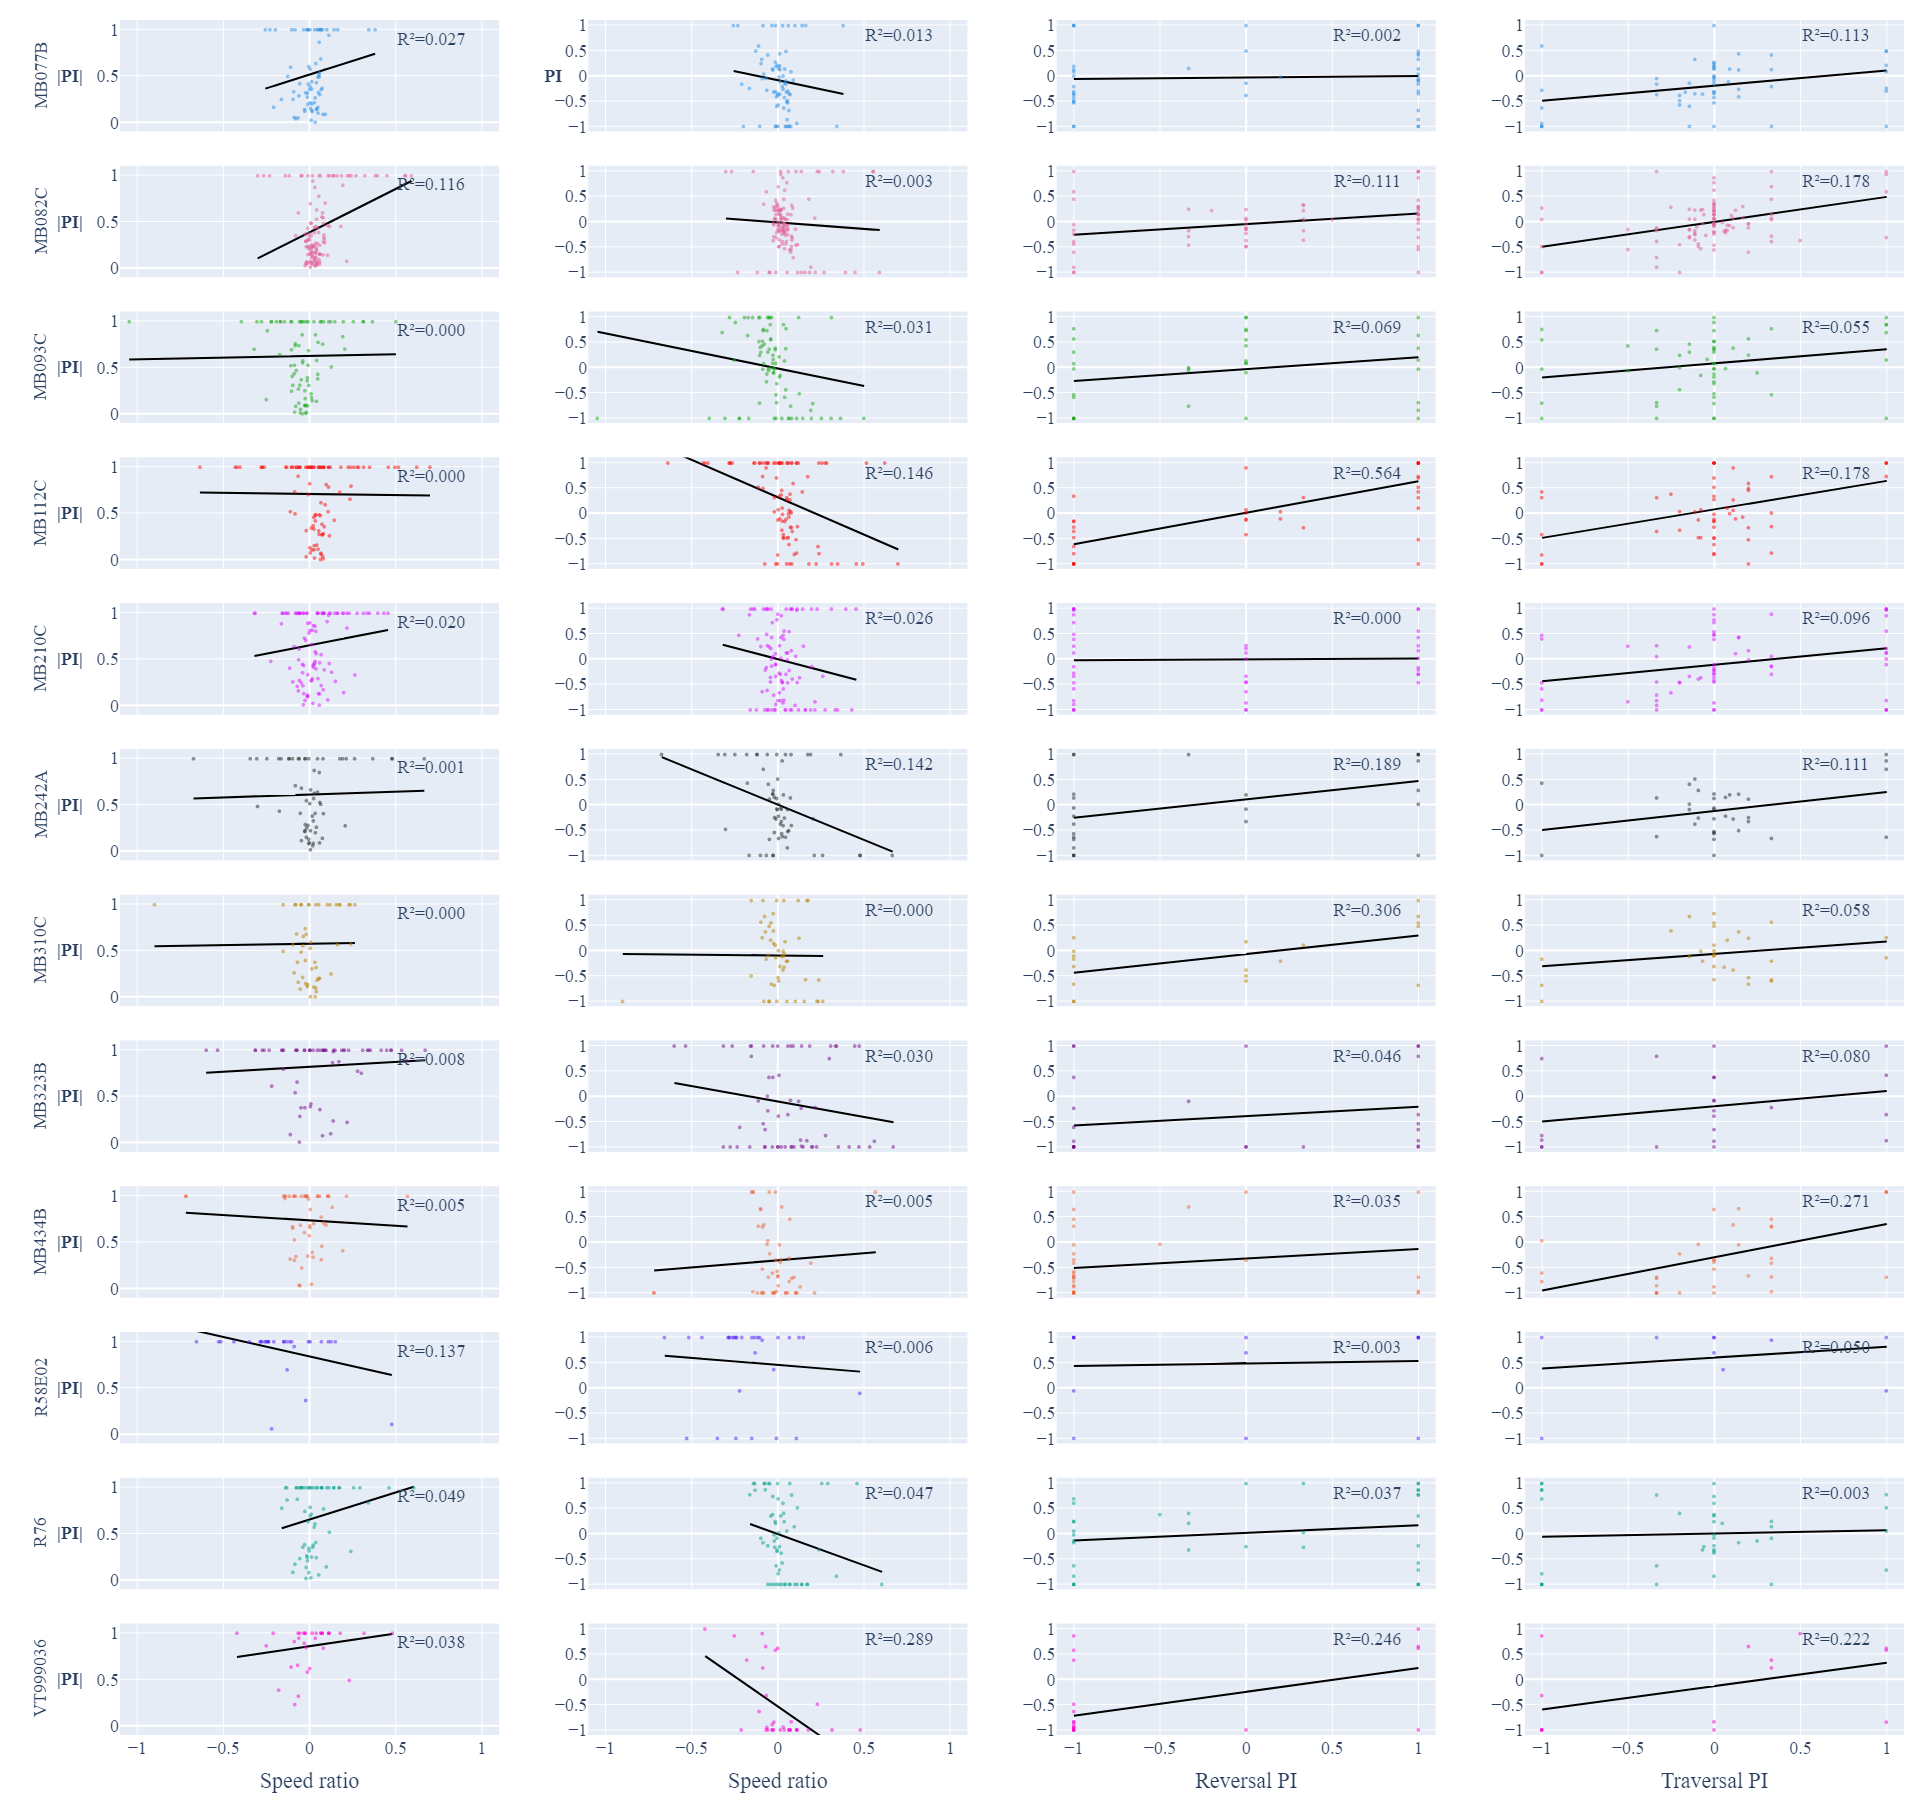

In [ ]:
#massplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score
import plotly.express as px

dfi["abs_pi_smoothed_bs"] = abs(dfi["pi_smoothed_baseline_corrected"])
dfi["abs_pi_smoothed_nbs"] = abs(dfi["pi_smoothed_not_baseline_corrected"])
dfi["abs_pi_smoothed_01"] = abs(dfi["pi_smoothed_Pattern 01"])
dfi["abs_pi_smoothed_10"] = abs(dfi["pi_smoothed_Pattern 10"])

fig = make_subplots(rows=12, cols=4, row_heights=12*[0.125],shared_xaxes=True,vertical_spacing=0.02, horizontal_spacing = 0.05)


for name, n,color in zip(basegenotype, range(1, len(basegenotype)+1),px.colors.qualitative.Dark24):
    
    gen = dfi[dfi['MBON'] == name]
    gen.replace(np. nan,'',regex=True)
    
    fig.append_trace(go.Scattergl(x =(gen['log2_speed_ratio']),
    y=gen['abs_pi_smoothed_01'],
    mode='markers', marker = dict(size=4, opacity = 0.5, color=color),
    name='abs PI vs Speed ratio'
), row=n, col=1)
    #regression
    gengen=pd.DataFrame()
    gengen = gen.loc[:,['log2_speed_ratio', 'abs_pi_smoothed_01']]
    gengen.dropna(inplace=True)
    reg = LinearRegression().fit(np.vstack(gengen['log2_speed_ratio']), gengen['abs_pi_smoothed_01'])
    gengen['bestfit_1'] = reg.predict(np.vstack(gengen['log2_speed_ratio'])) 
    r2_1 = reg.score(gengen['log2_speed_ratio'].values.reshape(-1, 1), gengen['abs_pi_smoothed_01'].values)
    fig.add_trace(go.Scatter(name='line of best fit', x=gengen['log2_speed_ratio'], y=gengen['bestfit_1'], mode='lines'), row=n, col=1)
    fig.update_traces(line_color="#000000", selector=dict(type='scatter'), row=n, col=1)
    fig.add_annotation(x=0.70, y=0.9,
            text='R\u00b2='+str("{:.3f}".format(r2_1)), xref="paper", yref="paper",
            showarrow=False,row=n,col=1)

        
    
    fig.append_trace(go.Scattergl(x =(gen['log2_speed_ratio']),
    y=gen['pi_smoothed_Pattern 01'],
    mode='markers',
    name='PI vs Speed ratio',marker = dict(size=4, opacity = 0.5, color=color),
), row=n, col=2)
    #regression
    gengen=pd.DataFrame()
    gengen = gen.loc[:,['log2_speed_ratio', 'pi_smoothed_Pattern 01']]
    gengen.dropna(inplace=True)
    reg = LinearRegression().fit(np.vstack(gengen['log2_speed_ratio']), gengen['pi_smoothed_Pattern 01'])
    gengen['bestfit_1'] = reg.predict(np.vstack(gengen['log2_speed_ratio']))   
    r2_2 = reg.score(gengen['log2_speed_ratio'].values.reshape(-1, 1), gengen['pi_smoothed_Pattern 01'].values)
    fig.add_trace(go.Scatter(name='line of best fit', x=gengen['log2_speed_ratio'], y=gengen['bestfit_1'], mode='lines'), row=n, col=2)
    fig.update_traces(line_color="#000000", selector=dict(type='scatter'), row=n, col=2)
    fig.add_annotation(x=0.70, y=0.8,
        text='R\u00b2='+str("{:.3f}".format(r2_2)),
        showarrow=False,xref="paper", yref="paper",row=n,col=2)                 
                     

    fig.append_trace(go.Scattergl(x =(gen['reversal_light_pi']),
    y=gen['pi_smoothed_Pattern 01'],
    mode='markers',
    name='PI vs reversal PI',marker = dict(size=4, opacity = 0.5, color=color),
), row=n, col=3)
    #regression
    gengen=pd.DataFrame()
    gengen = gen.loc[:,['reversal_light_pi', 'pi_smoothed_Pattern 01']]
    gengen.dropna(inplace=True)
    reg = LinearRegression().fit(np.vstack(gengen['reversal_light_pi']), gengen['pi_smoothed_Pattern 01'])
    gengen['bestfit_1'] = reg.predict(np.vstack(gengen['reversal_light_pi']))
    r2_3 = reg.score(gengen['reversal_light_pi'].values.reshape(-1, 1), gengen['pi_smoothed_Pattern 01'].values)
    fig.add_trace(go.Scatter(name='line of best fit', x=gengen['reversal_light_pi'], y=gengen['bestfit_1'], mode='lines'), row=n, col=3)
    fig.update_traces(line_color="#000000", selector=dict(type='scatter'), row=n, col=3)
    fig.add_annotation(x=0.70, y=0.8,
        text='R\u00b2='+str("{:.3f}".format(r2_3)),
        showarrow=False,xref="paper", yref="paper",row=n,col=3)

    
    
    fig.append_trace(go.Scattergl(x =(gen['traversal_light_pi']),
    y=gen['pi_smoothed_Pattern 01'],
    mode='markers',
    name='PI vs reversal PI',marker = dict(size=4, opacity = 0.5, color=color),
), row=n, col=4)    
    #regression
    gengen=pd.DataFrame()
    gengen = gen.loc[:,['traversal_light_pi', 'pi_smoothed_Pattern 01']]
    gengen.dropna(inplace=True)    
    reg = LinearRegression().fit(np.vstack(gengen['traversal_light_pi']), gengen['pi_smoothed_Pattern 01'])
    gengen['bestfit_1'] = reg.predict(np.vstack(gengen['traversal_light_pi']))
    r2_4 = reg.score(gengen['traversal_light_pi'].values.reshape(-1, 1), gengen['pi_smoothed_Pattern 01'].values)    
    fig.add_trace(go.Scatter(name='line of best fit', x=gengen['traversal_light_pi'], y=gengen['bestfit_1'], mode='lines'), row=n, col=4)
    fig.update_traces(line_color="#000000", selector=dict(type='scatter'), row=n, col=4)
    fig.add_annotation(x=0.70, y=0.8,
    text='R\u00b2='+str("{:.3f}".format(r2_4)),
    showarrow=False,xref="paper", yref="paper",row=n,col=4)
    

#x axes
fig.update_xaxes(title_text = "Speed ratio",row=12, col=1)
fig.update_xaxes(title_text = "Speed ratio",row=12, col=2)
fig.update_xaxes(title_text="Reversal PI",row=12, col=3)
fig.update_xaxes(title_text="Traversal PI",row=12, col=4)

for d in range(1,5):
    for c in range(1, len(basegenotype)+1):        
        fig.update_xaxes(range=[-1.1,1.1],tickvals=np.arange(-1,1.1,0.5),row=c, col=d)
    
#y axes
for c in range(1, len(basegenotype)+1):
    fig.add_annotation(x=-1.1, y=0.5, text='<b>|PI|</b>', showarrow=False,xshift =-50, yshift=0,row=c,col=1)
    fig.update_yaxes(range=[-0.1,1.1],tickvals=np.arange(0,1.1,0.5),row=c, col=1)


for d in range(2,5):
    for c in range(1, len(basegenotype)+1):        
        fig.update_yaxes(range=[-1.1,1.1],tickvals=np.arange(-1,1.1,0.5),row=c, col=d)
    
fig.add_annotation(x=-1.1, y=0, text='<b>PI</b>', showarrow=False,xshift =-35, yshift=0,row=1,col=2)


for name, n in zip(basegenotype, range(1, len(basegenotype)+1)):
    fig.add_annotation(x=-1.1, y=0.5, text= name, textangle =-90, showarrow=False,xshift =-80, yshift=0,row=n,col=1)

fig.update_layout(height=1800, width=1600, hovermode='x unified', showlegend=False,font=dict(family="ibm plex sans",size=18,), margin=dict(l=120, r=20, t=20, b=20))

fig.write_image("D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\Images\\Nicole's figures\\Chrimson\\Total compilation of PI_smoothed_Pattern 01.svg")
fig.show()

In [ ]:
cols = ['Genotype', 'pi_smoothed_Pattern 01','reversal_light_pi', 'traversal_light_pi','light_attraction_index_baseline_corrected','log2_speed_ratio']
lst = []
for loc,name in zip(baseDirectory,basegenotype):
    
    df = osar.osar(loc,driver = name).results

    df1 = df[(df['light_intensity']=='Full')].loc[:,['light_intensity','status','pi_smoothed_Pattern 01', 'reversal_light_pi', 'traversal_light_pi', 'light_attraction_index_baseline_corrected', 'log2_speed_ratio']].reset_index()
    test = df1.loc[:,['status','log2_speed_ratio']]
    test.replace([np.inf, -np.inf], np.nan, inplace=True)
    test.dropna(inplace=True)
    lst.append([name, dabest.load(df1, idx=("Sibling", "Offspring"),x="status", y="pi_smoothed_Pattern 01").mean_diff.results.difference[0],
               dabest.load(df1, idx=("Sibling", "Offspring"),x="status", y="reversal_light_pi").mean_diff.results.difference[0],
               dabest.load(df1, idx=("Sibling", "Offspring"),x="status", y="traversal_light_pi").mean_diff.results.difference[0],
               dabest.load(df1, idx=("Sibling", "Offspring"),x="status", y="light_attraction_index_baseline_corrected").mean_diff.results.difference[0],
               dabest.load(test, idx=("Sibling", "Offspring"),x="status", y="log2_speed_ratio").mean_diff.results.difference[0]])
df1 = pd.DataFrame(lst, columns=cols)
df1.to_csv('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\deltas_ACRfull.csv')

Creating borders for each fly...
Done.

Processing CSV 71 of 71
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 56 of 56
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 57 of 57
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 52 of 52
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 65 of 65
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 84 of 84
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 68 of 68
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 79 of 79
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 55 of 55
Summarising results for all flies...
All done.
C

C:\Users\lnico\anaconda3\lib\site-packages\dabest\_classes.py:774: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(err_temp.substitute(lim_type="lower",


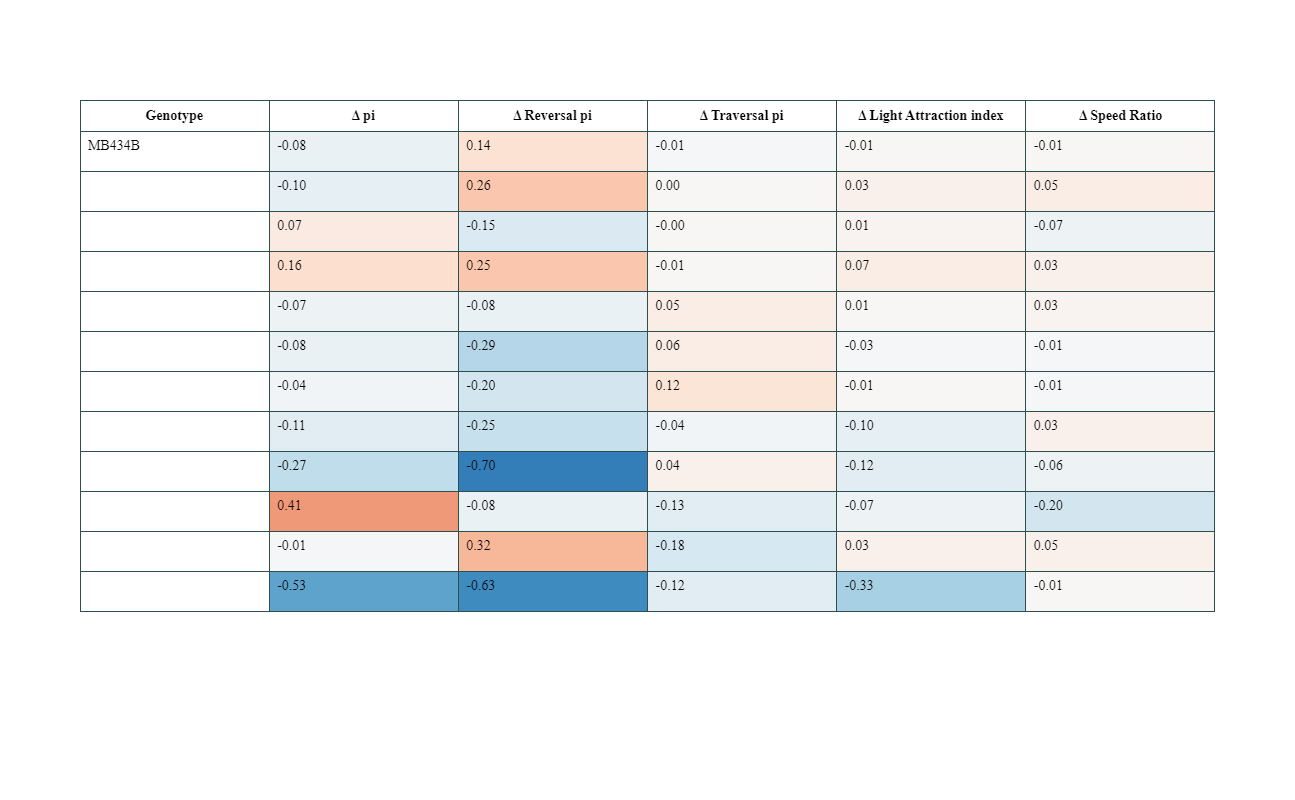

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#df1 = pd.read_csv('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\deltas_Chrimson2.csv')
df1 = pd.read_csv("D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\deltas_Chrimson2full.csv")
df1.drop('Unnamed: 0', axis=1, inplace=True) 
df2=df1.copy()
df2.loc[len(df2)] = ['test', 1, 1,1,1,1]
df2.loc[len(df2)] = ['test', -1,-1,-1,-1,-1]

basegenotype = df2['Genotype'].unique()


def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in df2.columns[1:]:
    df2.loc[((df2[col]>1)), [col]] = 1
    df2.loc[((df2[col]<-1)), [col]] = -1
    df2[col] = min_max_scaling(df2[col])

rdbu = cm.get_cmap('RdBu_r', 100)
pic, revc, travc, latc,spdc=[],[],[],[],[]
for n in range(0,len(df2)):
    pic.append('rgb(' + str(rdbu(round(df2.iloc[n,1]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,1]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,1]*100))[2]*255)+')')
    revc.append('rgb(' + str(rdbu(round(df2.iloc[n,2]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,2]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,2]*100))[2]*255)+')')
    travc.append('rgb(' + str(rdbu(round(df2.iloc[n,3]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,3]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,3]*100))[2]*255)+')')
    latc.append('rgb(' + str(rdbu(round(df2.iloc[n,4]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,4]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,4]*100))[2]*255)+')')
    spdc.append('rgb(' + str(rdbu(round(df2.iloc[n,5]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,5]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,5]*100))[2]*255)+')')

pi, rev, trav, lat,spd=[],[],[],[],[]
for n in range(0,len(df1)):
    pi.append(str("{:.2f}".format(df1.iloc[n,1])))
    rev.append(str("{:.2f}".format(df1.iloc[n,2])))
    trav.append(str("{:.2f}".format(df1.iloc[n,3])))
    lat.append(str("{:.2f}".format(df1.iloc[n,4])))
    spd.append(str("{:.2f}".format(df1.iloc[n,5])))

#root = "D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Chrimson2\\"
root = "D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Chrimson2\\"

startdir = os.listdir(root)
baseDirectory=[]
basegenotype=[]
for n,sd in enumerate(startdir):
    dir1 = os.path.join(root, os.listdir(root)[n])
    baseDirectory.append(dir1)
    basegenotype.append(re.search(r'^.*?(?= x)', (os.path.split(dir1)[1])).group(0))
    
fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Genotype</b>', '<b>Δ pi</b>','<b>Δ Reversal pi</b>', '<b>Δ Traversal pi</b>','<b>Δ Light Attraction index</b>','<b>Δ Speed Ratio</b>'],
    line_color='darkslategray', fill_color='white',
    align='center',font=dict(color='black', size=14)
  ),
  cells=dict(
    values=[basegenotype, pi, rev, trav, lat,spd],
    line_color=['darkslategray'],
    fill_color=[['white'], pic, revc, travc, latc,spdc],
    align='left', font=dict(color='black', size=14)
    ))
])
fig.update_layout(font=dict(family="ibm plex sans",size=18,),width=1200,height=800)
fig.update_traces(cells_height=40, selector=dict(type='table'))
#fig.write_image("D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\Images\\Nicole's figures\\Chrimson\\Table of PI numbers.svg")
fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

df1 = pd.read_csv('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\deltas_ACR.csv')
df1.drop('Unnamed: 0', axis=1, inplace=True) 
df2=df1.copy()
df2.loc[len(df2)] = ['test', 1, 1,1,1,1]
df2.loc[len(df2)] = ['test', -1,-1,-1,-1,-1]

basegenotype = df2['Genotype'].unique()


def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in df2.columns[1:]:
    df2.loc[((df2[col]>1)), [col]] = 1
    df2.loc[((df2[col]<-1)), [col]] = -1
    df2[col] = min_max_scaling(df2[col])

rdbu = cm.get_cmap('RdBu_r', 100)
pic, revc, travc, latc,spdc=[],[],[],[],[]
for n in range(0,len(df2)):
    pic.append('rgb(' + str(rdbu(round(df2.iloc[n,1]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,1]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,1]*100))[2]*255)+')')
    revc.append('rgb(' + str(rdbu(round(df2.iloc[n,2]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,2]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,2]*100))[2]*255)+')')
    travc.append('rgb(' + str(rdbu(round(df2.iloc[n,3]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,3]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,3]*100))[2]*255)+')')
    latc.append('rgb(' + str(rdbu(round(df2.iloc[n,4]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,4]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,4]*100))[2]*255)+')')
    spdc.append('rgb(' + str(rdbu(round(df2.iloc[n,5]*100))[0]*255)+','+str(rdbu(round(df2.iloc[n,5]*100))[1]*255)+','+str(rdbu(round(df2.iloc[n,5]*100))[2]*255)+')')

pi, rev, trav, lat,spd=[],[],[],[],[]
for n in range(0,len(df1)):
    pi.append(str("{:.2f}".format(df1.iloc[n,1])))
    rev.append(str("{:.2f}".format(df1.iloc[n,2])))
    trav.append(str("{:.2f}".format(df1.iloc[n,3])))
    lat.append(str("{:.2f}".format(df1.iloc[n,4])))
    spd.append(str("{:.2f}".format(df1.iloc[n,5])))
    
root = "D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\ACR\\"
startdir = os.listdir(root)
baseDirectory=[]
basegenotype=[]
for n,sd in enumerate(startdir):
    dir1 = os.path.join(root, os.listdir(root)[n])
    baseDirectory.append(dir1)
    basegenotype.append(re.search(r'^.*?(?= x)', (os.path.split(dir1)[1])).group(0))
    

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Genotype</b>', '<b>Δ pi</b>','<b>Δ Reversal pi</b>', '<b>Δ Traversal pi</b>','<b>Δ Light Attraction index</b>','<b>Δ Speed Ratio</b>'],
    line_color='darkslategray', fill_color='white',
    align='center',font=dict(color='black', size=14)
  ),
  cells=dict(
    values=[basegenotype, pi, rev, trav, lat,spd],
    line_color=['darkslategray'],
    fill_color=[['white'], pic, revc, travc, latc,spdc],
    align='left', font=dict(color='black', size=14)
    ))
])
fig.update_layout(font=dict(family="ibm plex sans",size=18,),width=1200,height=800)
fig.update_traces(cells_height=40, selector=dict(type='table'))
#fig.write_image("D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\Images\\Nicole's figures\\ACR\\Table of PI numbers.svg")
fig.show()